In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

Importamos el data set

In [261]:
df= pd.read_csv('cars.csv')
df = df.drop_duplicates() # elimina datos dulicados
df = df.dropna() # elimina NAN

Como lo que pretende la empresa es distribución de los coches de una manera eficiente, se ha decicido eliminar aquellas columnas que no aporten valor, quedandonos con la marca, carroceria, altura, anchura, longitud y precio. Al fin y al cabo, a la hora de realizar el almacenaje, las medidas del coche es lo que importa, no los caballos o la traccion.

In [262]:
datos = df.drop(columns= ['symboling', 'normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], axis = 1)
carroceria = df['body-style']
datos = datos.drop('body-style', axis = 1)

Categorizamos la variable de la marca

In [263]:
le = LabelEncoder()
datos.make= le.fit_transform(datos.make)

Para saber el número de clústeres posibles (k), se necesita realizar el dendograma y observar la distancia maxima del mismo.
Para obtener el mejor dendograma, se van cambiando los valores. Se cambia el metodo del linkage, que es el criterio de cómo se calcula la distancia entre clusteres.

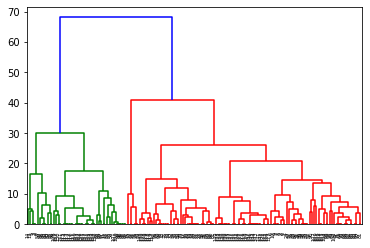

In [267]:
dendograma = sch.dendrogram(sch.linkage(datos, method='complete'))

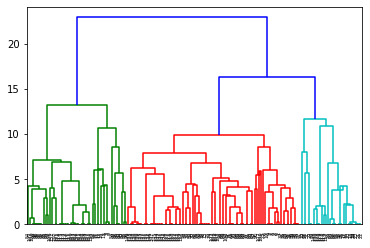

In [268]:
dendograma1 = sch.dendrogram(sch.linkage(datos, method='centroid'))

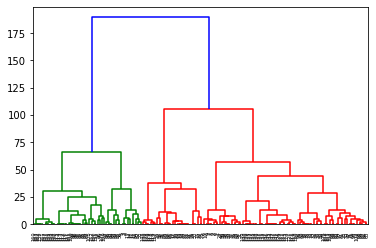

In [266]:
dendograma2 = sch.dendrogram(sch.linkage(datos, method='ward'))

Vistos los diferentes dendogramas, se escoge como el mejor el dendograma2. 

### Dibujo del dendograma y obtención de K

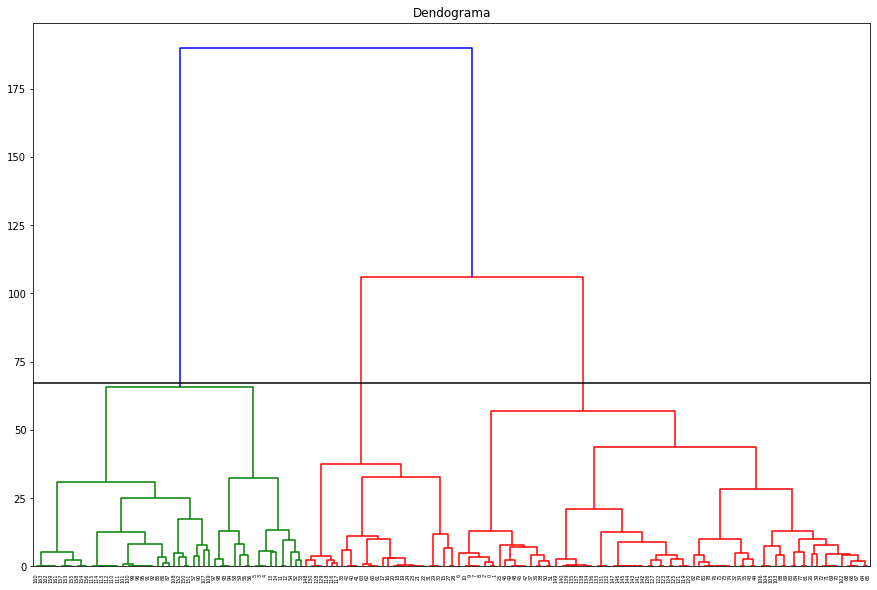

In [289]:
plt.figure(figsize=(15, 10))  
plt.title("Dendograma")
plt.axhline(y=67, color='k')
dendograma = sch.dendrogram(sch.linkage(datos, method='ward'))

Se ha dibujaddo la linea negra con el fin de mjorar la obtención del numero de clusteres. Como se puede observar, se obtienen 5 clusteres dustintos, por lo que se ha obtenido un valor de k=3.

#### Creción del modelo.

Se crea el modelo utilizando 3 clusteres. En etiquetas se guarda a qué grupo pertenece cada coche.

In [283]:
modelo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
etiquetas = modelo.fit_predict(datos) #devuelve las etiquetas del clúster además de hacer el ajuste

In [287]:
for x in range(0,len(datos)):
    print('Coche MARCA', datos['make'][x], 'LONGITUD', datos['length'][x], 'ANCHURA', datos['width'][x], 'ALTURA', datos['height'][x], 'pertenece al cluster', etiquetas[x])

Coche MARCA 0 LONGITUD 176.6 ANCHURA 66.2 ALTURA 54.3 pertenece al cluster 1
Coche MARCA 0 LONGITUD 176.6 ANCHURA 66.4 ALTURA 54.3 pertenece al cluster 1
Coche MARCA 0 LONGITUD 177.3 ANCHURA 66.3 ALTURA 53.1 pertenece al cluster 1
Coche MARCA 0 LONGITUD 192.7 ANCHURA 71.4 ALTURA 55.7 pertenece al cluster 0
Coche MARCA 0 LONGITUD 192.7 ANCHURA 71.4 ALTURA 55.7 pertenece al cluster 0
Coche MARCA 0 LONGITUD 192.7 ANCHURA 71.4 ALTURA 55.9 pertenece al cluster 0
Coche MARCA 0 LONGITUD 178.2 ANCHURA 67.9 ALTURA 52.0 pertenece al cluster 1
Coche MARCA 1 LONGITUD 176.8 ANCHURA 64.8 ALTURA 54.3 pertenece al cluster 1
Coche MARCA 1 LONGITUD 176.8 ANCHURA 64.8 ALTURA 54.3 pertenece al cluster 1
Coche MARCA 1 LONGITUD 176.8 ANCHURA 64.8 ALTURA 54.3 pertenece al cluster 1
Coche MARCA 1 LONGITUD 176.8 ANCHURA 64.8 ALTURA 54.3 pertenece al cluster 1
Coche MARCA 1 LONGITUD 189.0 ANCHURA 66.9 ALTURA 55.7 pertenece al cluster 0
Coche MARCA 1 LONGITUD 189.0 ANCHURA 66.9 ALTURA 55.7 pertenece al cluster 0

Se puede observar que efectivamente se agrupan los coches según las dimensiones de  los mismos (importando poco la marca), siendo el cluster 0, por lo general aquellos coches de mayores dimensiones, y eñ cluster 2 los de dimensiones más pequeñas.